# COURSE: A deep understanding of deep learning
## SECTION: FFNs
### LECTURE: FFN to classify digits
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202212

In [64]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-64-a8aed9fadacf>:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Import and process the data

In [65]:
# import dataset (comes with colab!)
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# extract labels (number IDs) and remove from data
labels = data[:,0]
data   = data[:,1:]

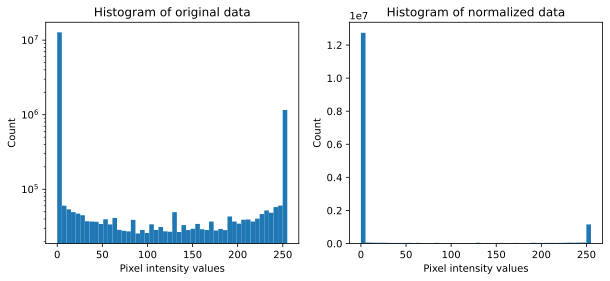

In [66]:
# normalize the data to a range of [0 1]
dataNorm = (data > 0).astype(float)

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(data.flatten(),50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')
ax[0].set_yscale('log')
ax[1].hist(data.flatten(),50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')

plt.show()

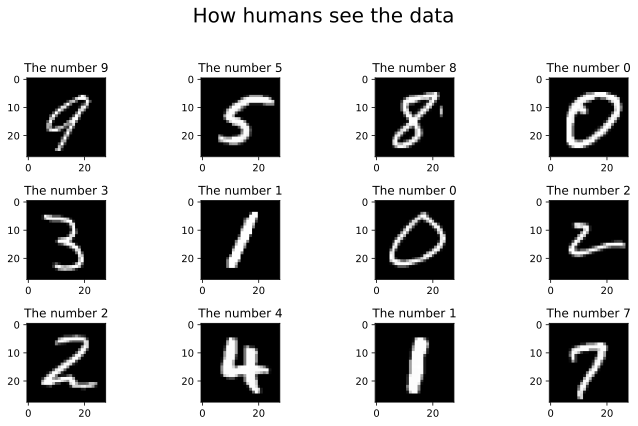

In [67]:
np.random.seed(2)
# show a few random digits
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  # pick a random image
  randimg2show = np.random.randint(0,high=data.shape[0])

  # create the image (must be reshaped!)
  img = np.reshape(data[randimg2show,:],(28,28))
  ax.imshow(img,cmap='gray')

  # title
  ax.set_title('The number %i'%labels[randimg2show])

plt.suptitle('How humans see the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

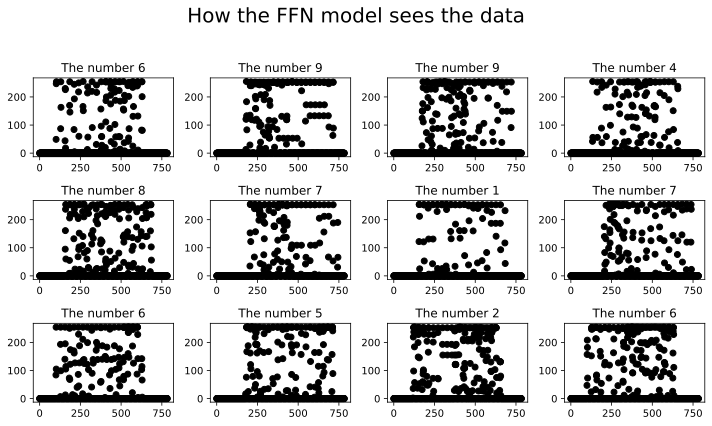

In [68]:
# show a few random digits
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  # pick a random image
  randimg2show = np.random.randint(0,high=data.shape[0])

  # create the image
  ax.plot(data[randimg2show,:],'ko')

  # title
  ax.set_title('The number %i'%labels[randimg2show])

plt.suptitle('How the FFN model sees the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

# Create train/test groups using DataLoader

In [69]:
# Step 1: convert to tensor
dataT   = torch.tensor( data ).float()
labelsT = torch.tensor( labels ).long() # long = int64

# Step 2: use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)

train_norm = train_data/torch.max(train_data)
test_norm = test_data/torch.max(test_data)




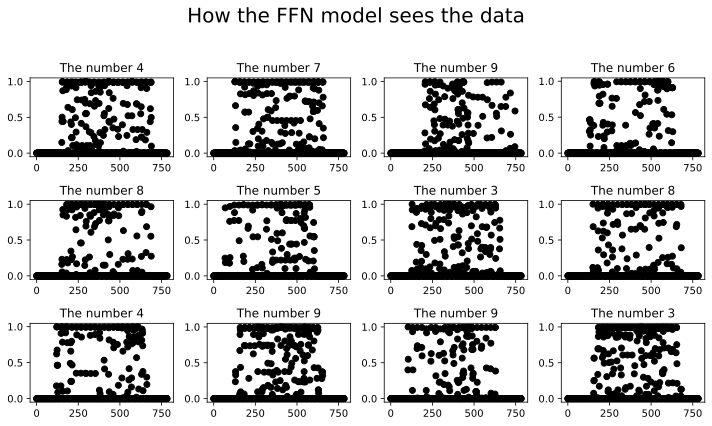

In [70]:
# show a few random digits
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  # pick a random image
  randimg2show = np.random.randint(0,high=train_norm.shape[0])

  # create the image
  ax.plot(train_norm[randimg2show,:],'ko')

  # title
  ax.set_title('The number %i'%labels[randimg2show])

plt.suptitle('How the FFN model sees the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

In [71]:
# check all variables in workspace
%whos

Variable                Type          Data/Info
-----------------------------------------------
DataLoader              type          <class 'torch.utils.data.dataloader.DataLoader'>
F                       module        <module 'torch.nn.functio<...>/torch/nn/functional.py'>
TensorDataset           type          <class 'torch.utils.data.dataset.TensorDataset'>
X                       Tensor        tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
ax                      Axes          Axes(0.785472,0.064537;0.199528x0.182685)
axs                     ndarray       3x4: 12 elems, type `object`, 96 bytes
batchsize               int           32
createTheMNISTNet       function      <function createTheMNISTNet at 0x7cbd2153bd00>
create_loader           function      <function create_loader at 0x7cbd19a2e5f0>
data                    ndarray       20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataNorm                ndarray       20000x784: 15680000 elems

# Create the DL model

In [72]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)

      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)

  # create the model instance
  net = mnistNet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [73]:
# test the model with one batch
# net,lossfun,optimizer = createTheMNISTNet()

# X,y = next(iter(train_loader))
# yHat = net(X)

# # values are log-probability of each number (0-9)
# # print(torch.exp(yHat))
# # print(torch.exp(yHat))
# # now let's compute the loss
# loss = lossfun(yHat,y)
# print(' ')
# print('Loss:')
# print(loss)

# Create a function that trains the model

In [74]:
# a function that trains the model

def funtion2trainTheModel(train_loader, test_loader):

  # number of epochs
  numepochs = 60

  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros((numepochs,2))
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi,0] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )
    losses[epochi,1] = lossfun(yHat,y)

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


# Run the model and show the results!

In [75]:
def make_loader(train_data, test_data, train_labels, test_labels):
  # Step 3: convert into PyTorch Datasets
  train_data = TensorDataset(train_data,train_labels)
  test_data  = TensorDataset(test_data,test_labels)

  # Step 4: translate into dataloader objects
  batchsize    = 32
  train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
  test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])
  return train_loader, test_loader

In [76]:
def print_ranges(train_data, test_data):
  print('Training data range %g to %g' %(torch.min(train_data[0]), torch.max(train_data[0])))
  print('Test data range %g to %g' %(torch.min(test_data[0]), torch.max(test_data[0])))

In [85]:
def plot_results(losses,trainAcc, testAcc):
  fig,ax = plt.subplots(1,2,figsize=(16,5))

  ax[0].plot(losses.detach().numpy())
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Model loss')
  ax[0].legend(['Train','Test'])

  ax[1].plot(trainAcc,label='Train')
  ax[1].plot(testAcc,label='Test')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy (%)')
  ax[1].set_ylim([10,100])
  ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
  ax[1].legend()

  plt.show()

Training data range 0 to 255
Test data range 0 to 255


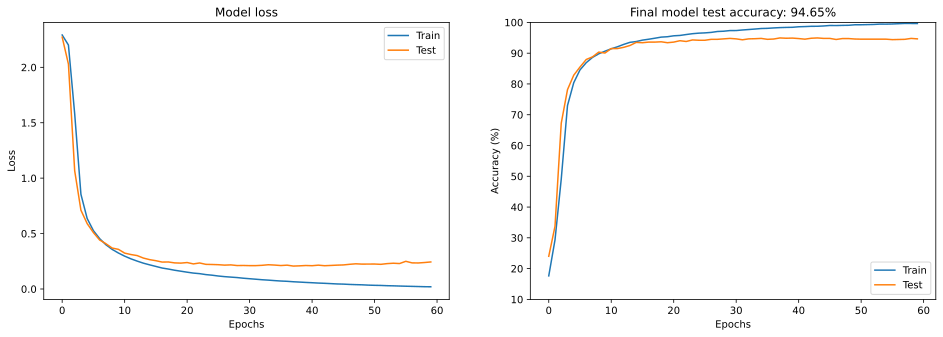

Training data range 0 to 1
Test data range 0 to 255


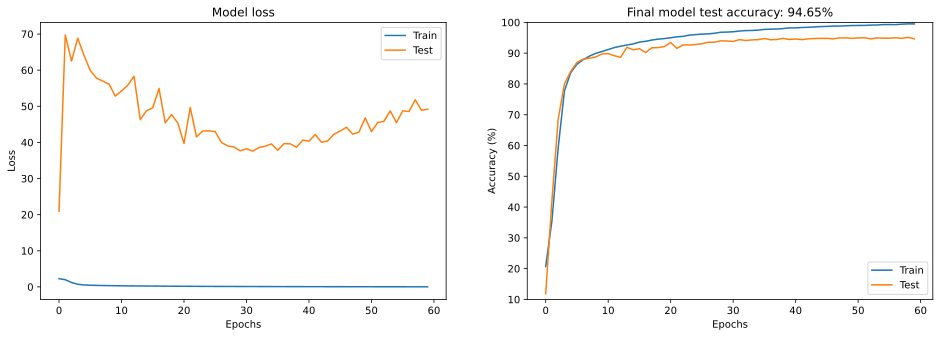

Training data range 0 to 255
Test data range 0 to 1


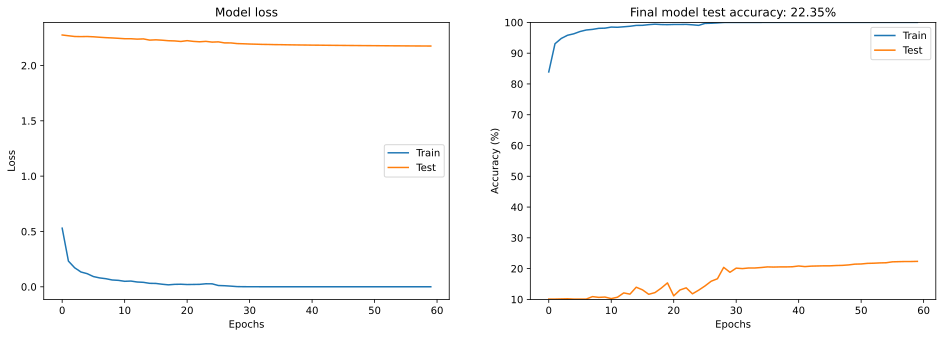

In [86]:
# train_data,test_data, train_labels,test_labels, train_norm, test_norm
train_loader, test_loader = make_loader(train_data, test_data, train_labels, test_labels)
norm_train_loader, norm_test_loader = make_loader(train_norm, test_norm, train_labels, test_labels)

# test 0 - both data sets are normalized
trainAcc,testAcc,losses,net = funtion2trainTheModel(norm_train_loader, norm_test_loader)
print_ranges(train_data, test_data)
plot_results(losses, trainAcc, testAcc)
# test1 - training data is normalized, test data is not
trainAcc,testAcc,losses,net = funtion2trainTheModel(norm_train_loader, test_loader)
print_ranges(train_norm, test_data)
plot_results(losses, trainAcc, testAcc)
# test 2 - training data is not normalized, test data is
trainAcc,testAcc,losses,net = funtion2trainTheModel(train_loader, norm_test_loader)
print_ranges(train_data, test_norm)
plot_results(losses, trainAcc, testAcc)

- Losses are scale dependent
- accuracy is boolean
- DL models find patterns in data, numerical range may not be important
- losses show wheter the model is stll learning; accuracy is the metric that we really care about

## Take aways
- Always normalize
- normalization also helps prevent numerical inaccuracies in weights and gradients